In [ ]:
import numpy as np
import skimage.data
import matplotlib.pyplot as plt

In [ ]:
def convolve(image, filter):
    # Get the dimensions of the image and filter
    i_h, i_w = image.shape
    f_h, f_w = filter.shape

    # Calculate the output dimensions
    o_h = i_h - f_h + 1
    o_w = i_w - f_w + 1

    # Create the output array
    output = np.zeros((o_h, o_w))

    # Perform the convolution
    for i in range(o_h):
        for j in range(o_w):
            output[i,j] = np.sum(image[i:i+f_h, j:j+f_w] * filter)

    return output


In [ ]:
def relu(output):
    return np.maximum(0, output)

In [ ]:
def maxpool(image, pool_size, stride):
    # Get the dimensions of the image
    h, w = image.shape

    # Calculate the output dimensions
    o_h = (h - pool_size) // stride + 1
    o_w = (w - pool_size) // stride + 1

    # Create the output array
    output = np.zeros((o_h, o_w))

    # Perform max pooling with striding
    for i in range(o_h):
        for j in range(o_w):
            output[i,j] = np.max(image[i*stride:i*stride+pool_size, j*stride:j*stride+pool_size])

    return output

In [ ]:
def flatten(matrix):
    vector = matrix.flatten()
    return vector

In [ ]:
# Define the image as a 8x8 matrix
image = np.array([[-1,2,-3,4,-5,6,7,8],
                  [4,-5,6,1,-2,-3,-7,8],
                  [7,8,-9,-10,11,-12,13,14],
                  [11,-2,13,-4,-5,16,-7,8],
                  [4,-15,6,1,-12,3,7,18],
                  [17,-8,-9,-10,-11,12,-13,14],
                  [1,-2,3,-4,5,-6,-7,8],
                  [4,-5,6,-1,2,-3,-7,8]])

# Define the filter as a 3x3 matrix
filter = np.array([[1,1,1],
                   [1,-1,1],
                   [1,1,1]])

# Define weights
w = np.random.randn(25)

# Call the convolution function
o1 = convolve(image, filter)
print(" convolutional :\n")
print(o1)
print("\n")

# Call the relu function
o2 = relu(o1)
print("relu :\n")
print(o2)
print("\n")

# Call the maxpool function
print("maxpool :\n")
o3 = maxpool(o2,2,1)
print(o3)
print("\n")

# Call the flatten function
print("flatten :\n")
o4 = flatten(o3)
print(o4)
print("\n")
print(len(o4))

 convolutional :

[[ 19. -18.  -9.  -6.  14.  48.]
 [ 17.  16.  21. -30.  28.   4.]
 [ 27. -38.  -1.  -2. -18.  74.]
 [ 47. -40. -33.  14. -16.  44.]
 [ 13. -20. -11.   0. -46.  62.]
 [ 11. -36. -11. -26. -16.  20.]]


relu :

[[19.  0.  0.  0. 14. 48.]
 [17. 16. 21.  0. 28.  4.]
 [27.  0.  0.  0.  0. 74.]
 [47.  0.  0. 14.  0. 44.]
 [13.  0.  0.  0.  0. 62.]
 [11.  0.  0.  0.  0. 20.]]


maxpool :

[[19. 21. 21. 28. 48.]
 [27. 21. 21. 28. 74.]
 [47.  0. 14. 14. 74.]
 [47.  0. 14. 14. 62.]
 [13.  0.  0.  0. 62.]]


flatten :

[19. 21. 21. 28. 48. 27. 21. 21. 28. 74. 47.  0. 14. 14. 74. 47.  0. 14.
 14. 62. 13.  0.  0.  0. 62.]


25


In [ ]:
# Define the activation function (sigmoid)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [ ]:
# Define the derivative of the activation function (sigmoid)
def sigmoid_derivative(x):
    return x * (1 - x)

In [ ]:
# Define the forward propagation function
def forward_propagation(X, w1, b1):
    z1 = np.dot(X, w1) + b1
    y_pred = sigmoid(z1)
    return y_pred, z1

In [ ]:
# Define the backpropagation function
def backpropagation(X, y, y_pred, z1):
    delta2 = (y_pred - y) * sigmoid_derivative(y_pred)
    d_w2 = np.dot(a1.T, delta2)
    delta1 = np.dot(delta2, w2.T) * sigmoid_derivative(a1)
    d_w1 = np.dot(X.T, delta1)
    return d_w1, d_w2

In [ ]:
# Predict the output for new inputs
X_test = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_pred, _, _, _ = forward_propagation(X_test, w1, b1, w2, b2)
print(f"Predictions: {y_pred}")

In [ ]:
# Define the input and output data
X = np.array(o4)
y = 0.8

# Initialize the weights and biases
weights = np.random.randn(25)
w = np.array(weights)
b = 0.3

# Define the training loop
#num_iterations = 10000
#learning_rate = 0.1

#Itarating over 100 epocs
#for i in range(num_iterations):
# Forward propagation
y_pred, z1 = forward_propagation(X, w, b)
# Backpropagation
print(y_pred)
print(z1)

d_w1, d_w2 = backpropagation(X, y, y_pred, z1)


1.0
129.67046144245165


# Performing CNN on image

(300, 451)
[[0.48523098 0.48523098 0.47738784 ... 0.11692392 0.11692392 0.11692392]
 [0.49699569 0.49307412 0.48523098 ... 0.12336824 0.1225349  0.1272898 ]
 [0.50849255 0.50457098 0.49475569 ... 0.12336039 0.12728196 0.13120353]
 ...
 [0.24786745 0.29884784 0.40501294 ... 0.58914824 0.58914824 0.58914824]
 [0.38173647 0.42487373 0.39628392 ... 0.57403529 0.57403529 0.57795686]
 [0.42487373 0.36883294 0.36042431 ... 0.55442745 0.55442745 0.55834902]]


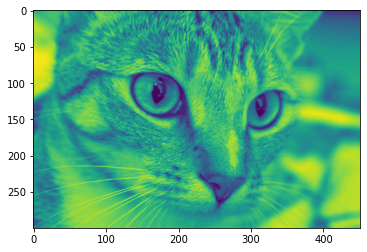

In [ ]:
 # Reading the image
img = skimage.data.chelsea()

# Converting the image into gray.
img = skimage.color.rgb2gray(img)

# Print the shape of the NumPy array
print(img.shape)

# Print the pixel values
print(img)

# Show the image using Matplotlib
plt.imshow(img)
plt.show()

In [ ]:
l1_filter = np.zeros((2,3,3))
l1_filter[0, :, :] = np.array([[[-1, 0, 1],
                                [-1, 0, 1],
                                [-1, 0, 1]]])
l1_filter[1, :, :] = np.array([[[1, 1, 1],
                                [0, 0, 0],
                                [-1, -1, -1]]])

In [ ]:
# Call the convolution function
conv1 = convolve(img, l1_filter[0, :, :])
conv2 = convolve(img, l1_filter[1, :, :])
print(" convolutional :\n")
print("convolutional for filter 1 is \n",conv1)
print("\n")
print("convolutional for filter 2 is \n",conv2)
print("\n")

In [ ]:
# Call the relu function
relu1 = relu(conv1)
relu2 = relu(conv2)
print("relu :\n")
print("Relu of conv1 :\n",relu1)
print("\n")
print("Relu of conv2 :\n",relu2)
print("\n")

relu :

Relu of conv1 :
 [[0.         0.         0.         ... 0.         0.         0.01176471]
 [0.         0.         0.         ... 0.         0.00310314 0.01625176]
 [0.         0.         0.         ... 0.         0.00533529 0.01625176]
 ...
 [0.2025298  0.23276353 0.15765059 ... 0.         0.00198    0.        ]
 [0.21147412 0.14478471 0.0173302  ... 0.00110902 0.00503059 0.        ]
 [0.10724353 0.         0.         ... 0.00840157 0.00840157 0.00784314]]


Relu of conv2 :
 [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.10789216 0.10205882 0.10014706]
 [0.         0.         0.         ... 0.10003333 0.09556118 0.08716745]
 [0.         0.01862667 0.07183922 ... 0.11208078 0.10812157 0.10024078]]




In [ ]:
# Call the maxpool function
print("maxpool :\n")
max1 = maxpool(relu1,3,1)
max2 = maxpool(relu2,3,1)
print("maxpooling of img1 :\n", max1)
print("\n")
print("maxpooling of img1 :\n", max2)
print("\n")

maxpool :

maxpooling of img1 :
 [[0.         0.         0.         ... 0.01815647 0.01537373 0.01625176]
 [0.         0.         0.         ... 0.00642941 0.00642941 0.01625176]
 [0.         0.         0.         ... 0.00585608 0.00585608 0.01625176]
 ...
 [0.24841216 0.24841216 0.24841216 ... 0.         0.00285098 0.00285098]
 [0.24841216 0.24841216 0.24841216 ... 0.00110902 0.00503059 0.00503059]
 [0.23276353 0.23276353 0.15765059 ... 0.00840157 0.00840157 0.00840157]]


maxpooling of img1 :
 [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.06962627 0.06962627 0.13394431 ... 0.10789216 0.10789216 0.10789216]
 [0.03601529 0.08669216 0.13394431 ... 0.11572745 0.11011647 0.10789216]
 [0.07183922 0.08669216 0.13394431 ... 0.12162824 0.1207949  0.11208078]]




In [ ]:
# Call the flatten function
print("flatten :\n")
flat1 = flatten(max1)
flat2 = flatten(max2)
print("flatten for kernal1 :", flat1)
print("\n")
print("flatten for kernal1 :", flat2)
print("\n")

print("length of the "len(flat1))
print(len(flat2))

flatten :

flatten for kernal1 : [0.         0.         0.         ... 0.00840157 0.00840157 0.00840157]


flatten for kernal1 : [0.         0.         0.         ... 0.12162824 0.1207949  0.11208078]


132312
132312
